# Introduction to BSplines


We start this section by recalling some basic properies about B-splines curves and surfaces. We also recall some fundamental algorithms (knot insertion and degree elevation). 

[//]: # (For a basic introduction to the subject, we refer to the books <cite data-cite="piegl"></cite> and <cite data-cite="Farin_Book2002"></cite>.)  

A B-Splines family, $(N_i)_{ 1 \leqslant i \leqslant n}$ of order $k$, can be generated using a non-decreasing sequence **of knots** $T=(t_i)_{1\leqslant i \leqslant n + k}$.

## B-Splines series

The $j-th$ B-Spline of order $k$ is defined by the recurrence relation:

$$
   N_j^k = w_j^k N_j^{k-1} + ( 1 - w_{j+1}^k ) N_{j+1}^{k-1}
$$
where,

$$
   w_j^k (x) = \frac{x-t_j}{t_{j+k-1}-t_{j}} \hspace{2cm} N_j^1(x) = \chi_{ \left[ t_j, t_{j+1} \right[ }(x)
$$

for $k \geq 1$ and $1 \leq j \leq n$.

We note some important properties of a B-splines basis:

* B-splines are piecewise polynomial of degree $p=k-1$,

* Compact support; the support of $N_j^k$ is contained in $\left[ t_j, t_{j+k} \right]$ ,

* If $x \in~ ] t_j,t_{j+1} [$, then only the *B-splines* $\{ N_{j-k+1}^k,\cdots,N_{j}^k \}$ are non vanishing at $x$,

* Positivity: $\forall j \in \{1,\cdots,n \}~~N_j(x) >0, ~~\forall x \in ] t_j, t_{j+k} [$,

* Partition of unity  $\sum_{i=1}^n N_i^{k}(x) = 1, \forall x \in \mathbb{R}$,

* Local linear independence,

* If a knot $t_i$ has a multiplicity $m_i$ then the B-spline is $\mathcal{C}^{(p-m_i)}$ at $t_i$.



---
**Example**

In the following example we plot the family of BSplines generated by the knot vector $T=\{0, 0, 0, 1, 2, 3, 4, 5, 5, 5\}$ of degree $2$.

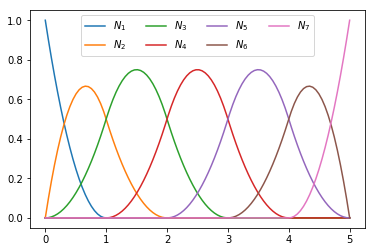

In [16]:
# importing the bsplines module
from bsplines import Bspline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ...
def plot_splines(T, p, xmin, xmax, nx=100):
    """Plots all BSplines of degree p and knots vector T"""
    # grid points for evaluation
    x = np.linspace(xmin,xmax,nx)

    # this is the number of the BSplines in the Schoenberg space
    N = len(T) - p - 1

    # create BSplines family with the knots sequence T 
    # of degree p
    bsp = Bspline(T,p)

    y = np.zeros((N,nx), dtype=np.double)
    for i in range(0,N):
        # evaluation of the i^th B-spline over x
        y[i]=bsp(x, i=i)
        plt.plot(x,y[i], label='$N_{}$'.format(i+1))
    plt.legend(loc=9, ncol=4)
    plt.show()    
# ...

# create a knots vector
T = np.array([0, 0, 0, 1, 2, 3, 4, 5, 5, 5])
# spline degree [here quadratic]
p = 2
# plot BSplines
plot_splines(T, p, xmin=0., xmax=5., nx=100)


---

### Knots vector families

There are two kind of **knots vectors**, called **clamped** and **unclamped**. Both families contains **uniform** and **non-uniform** sequences. 

The following are examples of such knots vectors

#### Clamped knots (open knots vector)

##### uniform


In [5]:
T1 = [0, 0, 0, 1, 2, 3, 4, 5, 5, 5]

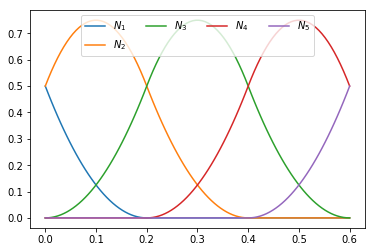

In [18]:
T2 = [-0.2, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 0.8]

plot_splines(T2, p=2, xmin=0., xmax=.6, nx=100)

##### non-uniform 

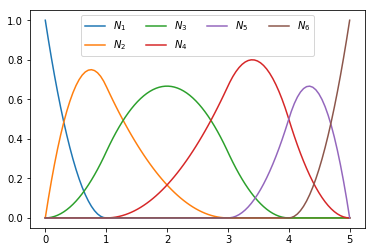

In [19]:
T3 = [0, 0, 0, 1, 3, 4, 5, 5, 5]

plot_splines(T3, p=2, xmin=0., xmax=5., nx=100)

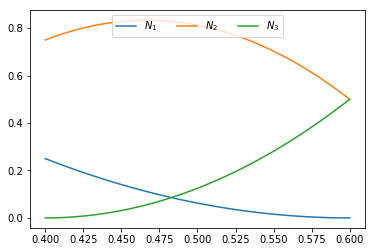

In [20]:
T4 = [-0.2, -0.2, 0.4, 0.6, 0.8, 0.8]

plot_splines(T4, p=2, xmin=0.4, xmax=.6, nx=100)

#### Unclamped knots

##### uniform

In [10]:
T5 = []

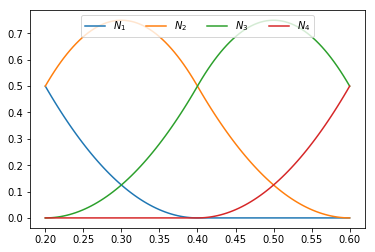

In [21]:
T6 = [-0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

plot_splines(T6, p=2, xmin=0.2, xmax=.6, nx=100)

##### non-uniform 

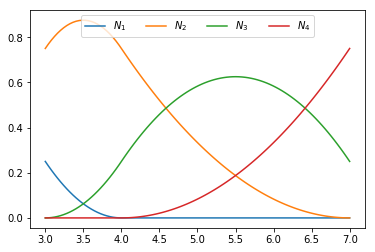

In [23]:
T7 = [0, 0, 3, 4, 7, 8, 9]

plot_splines(T7, p=2, xmin=3., xmax=7., nx=100)

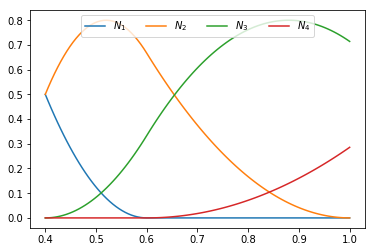

In [24]:
T8 = [-0.2, 0.2, 0.4, 0.6, 1.0, 2.0, 2.5]

plot_splines(T8, p=2, xmin=.4, xmax=1., nx=100)

## B-Spline curve

The B-spline curve in $\mathbb{R}^d$ associated to knots vector $T=(t_i)_{1\leqslant i \leqslant n + k}$ and the control polygon $(\mathbf{P}_i)_{ 1 \leqslant i \leqslant n}$ is defined by :

$$
   \mathcal{C}(t) = \sum_{i=1}^n N_i^k(t) \textbf{P}_i
$$

The following plot shows an example of a quadratic B-Spline curve, and its corresponding knot vector and control points.


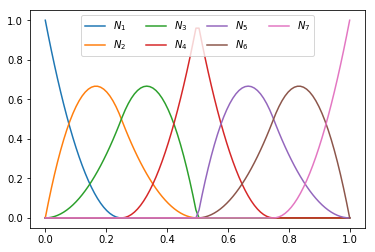

In [39]:
T = [0., 0., 0., 0.25, 0.5, 0.5, 0.75, 1., 1., 1.]
p = 2
plot_splines(T, p, xmin=0., xmax=1., nx=100)

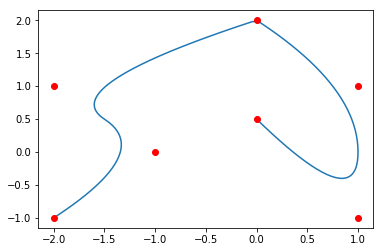

In [38]:
# normaly we should take an array of size (N-p-1) 
# ie the number of bsplines
# but scipy.interpolate.splev needs an array
# of the same size as T
x = np.zeros_like(T)
y = np.zeros_like(T)
x[0] =  0. ; y[0] =  .5
x[1] =  1. ; y[1] = -1.
x[2] =  1. ; y[2] =  1.
x[3] =  0. ; y[3] =  2.
x[4] = -2. ; y[4] =  1.
x[5] = -1. ; y[5] =  0.
x[6] = -2. ; y[6] = -1.

# splev to evaluate splines series
from scipy.interpolate import splev
tck_x = (T, x, p)
tck_y = (T, y, p)

# parametric grid points for evaluation
tau = np.linspace(0., 1., 200)
Px = splev(tau, tck_x)
Py = splev(tau, tck_y)
plt.plot(Px, Py)
plt.plot(x[:7],y[:7], 'or')
plt.show()


We have the following properties for a *B-spline* curve:

* If $n=k$, then $\mathcal{C}$ is just a Bézier-curve,

* $\mathcal{C}$ is a piecewise polynomial curve,

* The curve interpolates its extremas if the associated multiplicity of the first and the last knot are maximum (*i.e.* equal to $k$), *i.e.* open knot vector,

* Invariance with respect to affine transformations,

* Strong convex-hull property:

if $t_i \leq t \leq t_{i+1}$, then $\mathcal{C}(t)$ is inside the convex-hull associated to the control points $\mathbf{P}_{i-p},\cdots,\mathbf{P}_{i}$,

* Local modification : moving the $i^{th}$ control point $\mathbf{P}_{i}$ affects $\mathcal{C}(t)$, only in the interval $[t_i,t_{i+k}]$,
* The control polygon approaches the behavior of the curve.

---
**Note**

   In order to model a singular curve, we can use multiple control points : $\mathbf{P}_{i}=\mathbf{P}_{i+1}$.

---


## Multivariate tensor product splines

Let us consider $d$ knot vectors $\mathcal{T} = \{T^1,T^2,\cdots,T^d\}$. For simplicity, we consider that these knot vectors are open, which means that $k$ knots on each side are duplicated so that the spline is interpolating on the boundary, and of bounds $0$ and $1$. In the sequel we will use the notation $I=[0,1]$.
Each knot vector $T^i$, will generate a basis for a Schoenberg space, $\mathcal{S}_{k_{i}}(T^i,I)$. The tensor product of all these spaces is also a Schoenberg space, namely $\mathcal{S}_{\mathbf{k}}(\mathcal{T})$, where $\mathbf{k}=\{k_1,\cdots,k_d\}$. The cube $\mathcal{P}=I^d=[0,1]^d$, will be referred to as a patch.

The basis for $\mathcal{S}_{\mathbf{k}}(\mathcal{T})$ is defined by a tensor product :

$$
   N_{\mathbf{i}}^{\mathbf{k}} := N_{i_1}^{k_1} \otimes N_{i_2}^{k_2} \otimes \cdots \otimes N_{i_d}^{k_d}
$$

where, $\mathbf{i}=\{i_1,\cdots , i_d \}$.

A typical cell from $\mathcal{P}$ is a cube of the form : $Q_{\mathbf{i}}=[\xi_{i_1}, \xi_{i_1+1}] \otimes \cdots \otimes [\xi_{i_d}, \xi_{i_d+1}]$. 




## Deriving a B-spline curve

The derivative of a B-spline curve is obtained as:

$$
   \mathcal{C}^{\prime}(t) = \sum_{i=1}^{n} {N_{i}^{k}}^{\prime}(t) \mathbf{P}_i = \sum_{i=1}^{n} \left(\frac{p}{t_{i+p}-t_{i}}N_{i}^{k-1}(t) \mathbf{P}_i - \frac{p}{t_{i+1+p}-t_{i+1}}N_{i+1}^{k-1}(t) \mathbf{P}_i \right)
  = \sum_{i=1}^{n-1} {N_{i}^{k-1}}^{\ast}(t) \mathbf{Q}_i
$$

where $\mathbf{Q}_i = p \frac{\mathbf{P}_{i+1} - \mathbf{P}_i}{t_{i+1+p}-t_{i+1}}$, and $\{{N_{i}^{k-1}}^{\ast},~~1 \leq i \leq n-1\}$ are generated using the knot vector $T^{\ast}$, which is obtained from $T$ by reducing by one the multiplicity of the first and the last knot (in the case of open knot vector), *i.e.* by removing the first and the last knot.

More generally, by introducing the B-splines family $\{ {N_{i}^{k-j}}^{\ast}, 1 \leq i \leq n-j \}$ generated by the knots vector $T^{j^{\ast}}$ obtained from $T$ by removing the first and the last knot $j$ times, we have the following result:

---
**Proposition**

The $j^{th}$ derivative of the curve $\mathcal{C}$ is given by

$$
  \mathcal{C}^{(j)}(t) = \sum_{i=1}^{n-j} {N_{i}^{k-j}}^{\ast}(t) \mathbf{P}_i^{(j)}$
$$

where, for $j>0$

$$
  \mathbf{P}_i^{(j)} = \frac{p-j+1}{t_{i+p+1}-t_{i+j}} \left( \mathbf{P}_{i+1}^{(j-1)} - \mathbf{P}_i^{(j-1)} \right)
  \\
  \mbox{and} ~ ~ ~ \mathbf{P}_i^{(0)} = \mathbf{P}_i.
$$

---

By denoting $\mathcal{C}^{\prime}$ and $\mathcal{C}^{\prime\prime}$ the first and second derivative of the B-spline curve $\mathcal{C}$, it is easy to show that:

We have,

* $\mathcal{C}^{\prime}(0) = \frac{p}{t_{p+2}} \left(\mathbf{P}_{2} - \mathbf{P}_1\right)$,

* $\mathcal{C}^{\prime}(1) = \frac{p}{1-t_{n}} \left(\mathbf{P}_{n} - \mathbf{P}_{n-1}\right)$,

* $\mathcal{C}^{\prime\prime}(0) = \frac{p(p-1)}{t_{p+2}} \left( \frac{1}{t_{p+2}}\mathbf{P}_{1} - \{ \frac{1}{t_{p+2}} + \frac{1}{t_{p+3}} \} \mathbf{P}_2 + \frac{1}{t_{p+3}}\mathbf{P}_{3} \right)$,

* $\mathcal{C}^{\prime\prime}(1) = \frac{p(p-1)}{1-t_{n}} \left( \frac{1}{1-t_{n}}\mathbf{P}_{n} - \{ \frac{1}{1-t_{n}} + \frac{1}{1-t_{n-1}} \} \mathbf{P}_{n-1} + \frac{1}{1-t_{n-1}}\mathbf{P}_{n-2} \right)$.


---
**Example**

Let us consider the quadratic B-spline curve associated to the knots vector $T=\{000~\frac{2}{5}~\frac{3}{5}~111 \}$ and the control points $\{ P_i, 1 \leq i \leq 5 \}$:


$$
   \mathcal{C}(t) = \sum_{i=1}^{5} {N_{i}^{3}}^{\prime}(t) \mathbf{P}_i 
$$

we have, 

$$
   \mathcal{C}^{\prime}(t) = \sum_{i=1}^{4} {N_{i}^{2}}^{\ast}(t) \mathbf{Q}_i
$$

where 

$$
   \mathbf{Q}_1 = 5 \{\mathbf{P}_{2} - \mathbf{P}_1\}, ~~~~\mathbf{Q}_2 = \frac{10}{3} \{ \mathbf{P}_{3} - \mathbf{P}_2\},
   \\
   \mathbf{Q}_3 = \frac{10}{3} \{ \mathbf{P}_{4} - \mathbf{P}_3\},~~~~\mathbf{Q}_4 = 5 \{\mathbf{P}_{5} - \mathbf{P}_4\}.
$$

The *B-splines* $\{ {N_{i}^{2}}^{\ast},~~1 \leq i \leq 4\}$ are associated to the knot vector $T^{\ast}=\{00~\frac{2}{5}~\frac{3}{5}~11 \}$. 

---


## Fundamental geometric operations

By inserting new knots into the knot vector, we add new control points without changing the shape of the B-Spline curve. This can be done using the DeBoor algorithm :cite:$DeBoor_Book2001$. We can also elevate the degree of the B-Spline family and keep unchanged the curve :cite:$qi$. In (Fig. \ref{refinement_curve_B_Spline}), we apply these algorithms on a quadratic B-Spline curve and we show the position of the new control points.  


### Knot insertion


After modification, we denote by $\widetilde{n}, \widetilde{k}, \widetilde{T}$ the new parameters. $(\textbf{Q}_i)$ are the new control points.

One can insert a new knot $t$, where $t_j \leqslant t < t_{j+1}$. For this purpose we use the DeBoor algorithm :cite:$DeBoor_Book2001$:


$$
   \widetilde{n} = n+1
   \\
   \widetilde{k} = k
   \\
   \widetilde{T} = \{ t_1,.., t_j, t, t_{j+1},.., t_{n+k}\}
   \\
   \alpha_i = \left\{\begin{array}{cc}1 & 1 \leqslant i \leqslant j-k+1 \\\frac{t-t_i}{t_{i+k-1}-t_i} & j-k+2 \leqslant i \leqslant j \\0 & j+1 \leqslant i \end{array}\right.
   \\
   \textbf{Q}_i = \alpha_i \textbf{P}_i + (1-\alpha_i) \textbf{P}_{i-1}
$$

Many other algorithms exist, like blossoming for fast insertion algorithm. For more details about this topic, we refer to :cite:$goldman_lyche_book$. 

### Order elevation

We can elevate the order of the basis, without changing the curve. Several algorithms exist for this purpose. We used the one by Huang et al. :cite:$prautzsch$, :cite:$qi$.

A quadratic B-spline curve and its control points. The knot vector is $T = \{ 000, \frac{1}{4}, \frac{1}{2}, \frac{3}{4}, 1 1 1 \}$.

**TODO: plot**

The curve after a h-refinement by inserting the knots $\{ 0.15, 0.35\}$ while the degree is kept equal to $2$.

**TODO: plot**

The curve after a p-refinement, the degree was raised by $1$ (using cubic B-splines).

**TODO: plot**

The curve after duplicating the multiplicity of the internal knots $\{ \frac{1}{4}, \frac{1}{2}, \frac{3}{4} \}$, 
this leads to a B\'ezier description. We can then, split the curve into $4$ pieces (sub-domains), each one will corresponds to a quadratic B\'ezier curve.

**TODO: plot**

### Translation

**TODO**

### Rotation

**TODO**

### Scaling

**TODO**


In [4]:
# css style
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()